In [118]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt

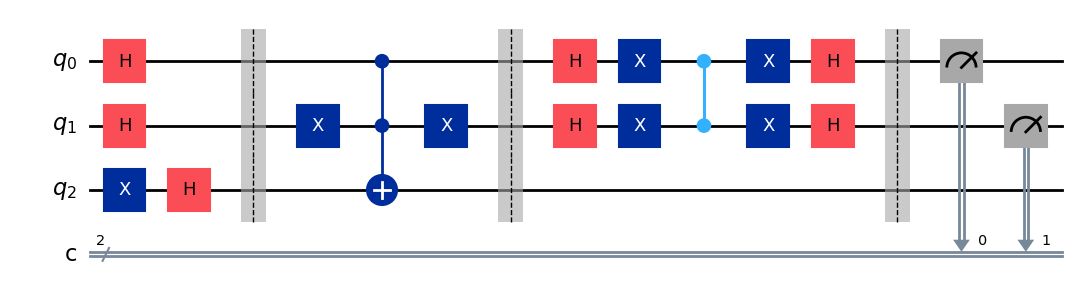

In [119]:
qc = QuantumCircuit(3, 2)
qc.h(range(2))
qc.x(2)
qc.h(2)
qc.barrier(range(3))
qc.x(1)
qc.ccx(0, 1, 2)
qc.x(1)
qc.barrier(range(3))
qc.h(range(2))
qc.x(range(2))
qc.cz(0, 1)
qc.x(range(2))
qc.h(range(2))
qc.barrier(range(3))
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw(output="mpl", filename="grover.png")

In [120]:
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
CCX = np.array(
    [
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
    ]
)
CZ = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])
v = np.array([1, 0, 0, 0, 0, 0, 0, 0]).reshape(8, 1)

In [121]:
# Gate 1:
Q3 = np.dot(X, H)
H23 = np.kron(H, Q3)
print(H23)
G1 = np.kron(H, H23)
print(G1.shape)

[[ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5 -0.5]]
(8, 8)


In [122]:
v1 = np.dot(G1, v)
print(v1)

[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]


In [123]:
# Gate 2:
Q12 = np.kron(I, X)
Q123 = np.kron(Q12, I)
G2 = np.dot(Q123, CCX)
G2 = np.dot(G2, Q123)
print(G2)

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


In [124]:
v2 = np.dot(G2, v1)
print(v2)

[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]


In [125]:
# Gate 3:
doubleH = np.kron(H, np.kron(H, I))
doubleX = np.kron(X, np.kron(X, I))
Q123 = np.dot(doubleH, doubleX)
G3 = np.dot(Q123, np.kron(CZ, I))
G3 = np.dot(G3, Q123)

In [126]:
v3 = np.dot(G3, v2)
print(v3)

[[ 0.35355339]
 [ 0.35355339]
 [-0.35355339]
 [-0.35355339]
 [-0.35355339]
 [-0.35355339]
 [ 0.35355339]
 [ 0.35355339]]


In [127]:
print(1 / 4 * np.sqrt(2))

0.3535533905932738
